# Kaggle : Predict survival on the Titanic
- Analysis Titanic data from kaggle

## Data Dictionary
### variable
- survival : 0 = No, 1 = Yes
- pclass : Ticket class / 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
- sex
- Age : Age in year
- sibsp : Number of siblings or spouses aboard the Titanic
- parch : Number of parents or childern
- ticket : Ticket number
- fare : Passenger fare
- cabin : Cabin number
- embarked : Port of embarked / C = Cherbourg, Q = Queenstown, S = Southamthon
- familysize : sibsp + parch + 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [6]:
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
def chart_bar(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    total = survived + dead
    survived_rate = survived/total
    df = pd.DataFrame([survived_rate])
    df.plot(kind = 'bar', title = ('Survived Rate : ' + feature), rot = 0, ylim = (0, 1))

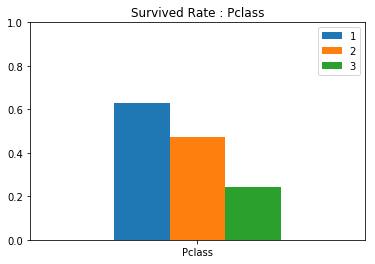

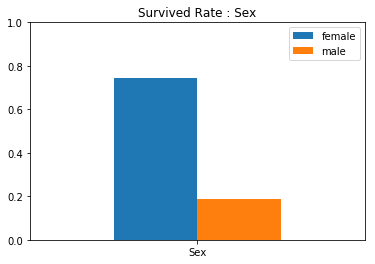

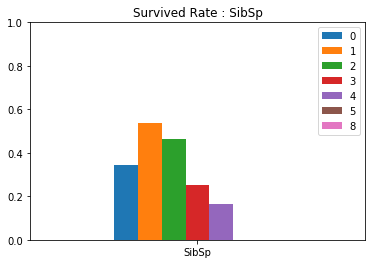

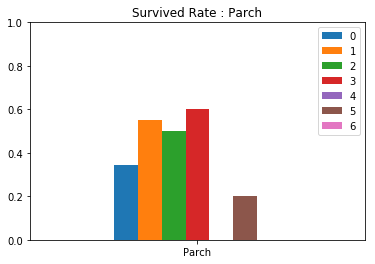

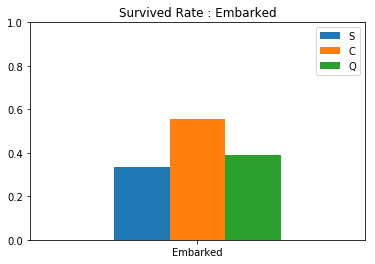

In [8]:
chart_bar('Pclass')
chart_bar('Sex')
chart_bar('SibSp')
chart_bar('Parch')
chart_bar('Embarked')

In [9]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Feature Engineering

## 1. Sex
- According to graph, "Sex" is the main element of survived rate.

In [10]:
train_test_data = [train, test]
for data in train_test_data:
    data.loc[data.Sex == 'male', 'Sex'] = 1
    data.loc[data.Sex == 'female', 'Sex'] = 0
# or
# sex_mapping = {'male' : 1, 'female' : 0}
# for data in train_test_data:
#    data["Sex"] = data["Sex"].map(sex_mapping)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   0  38.0      1      0   
2                             Heikkinen, Miss. Laina   0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  35.0      1      0   
4                           Allen, Mr. William Henry   1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

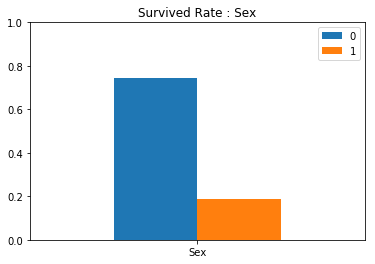

In [11]:
chart_bar("Sex")

## 2. Age
- Age should be a good indicator of survived rate.
- There are several NAN data in the age, so I convert those data to number.
- I assume NaN with 'Name' which include word 'Ms', 'Mr', else.

In [12]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   0  38.0      1      0   
2                             Heikkinen, Miss. Laina   0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  35.0      1      0   
4                           Allen, Mr. William Henry   1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [13]:
test.head()

PassengerId  Pclass                                          Name Sex  \
0          892       3                              Kelly, Mr. James   1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)   0   
2          894       2                     Myles, Mr. Thomas Francis   1   
3          895       3                              Wirz, Mr. Albert   1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   0   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [14]:
merge_name_age = pd.concat([train[["Name", "Age"]], test[["Name", "Age"]]])
merge_name_age.head()

Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0

In [15]:
merge_name_age["Name"] = merge_name_age["Name"].str.extract('([A-Za-z]+)[.]', expand = False)
merge_name_age.head()

Name   Age
0    Mr  22.0
1   Mrs  38.0
2  Miss  26.0
3   Mrs  35.0
4    Mr  35.0

In [16]:
merge_name_age["Name"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Countess      1
Dona          1
Lady          1
Jonkheer      1
Sir           1
Capt          1
Don           1
Mme           1
Name: Name, dtype: int64

In [17]:
print("Mean of 'Mr' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Mr'].Age.mean()), '\n')
print("Mean of 'Miss' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Miss'].Age.mean()), '\n')
print("Mean of 'Mrs' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Mrs'].Age.mean()), '\n')
print("Mean of 'Master' age : ", np.floor(merge_name_age[merge_name_age["Name"] == 'Master'].Age.mean()), '\n')
print("Mean of else : Mean of numbers after convert upper ages")
Mr_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Mr'].Age.mean())
Miss_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Miss'].Age.mean())
Mrs_mean = np.floor(merge_name_age[merge_name_age["Name"] == 'Mrs'].Age.mean())
Master_mean =  np.floor(merge_name_age[merge_name_age["Name"] == 'Master'].Age.mean())

Mean of 'Mr' age :  32.0 

Mean of 'Miss' age :  21.0 

Mean of 'Mrs' age :  36.0 

Mean of 'Master' age :  5.0 

Mean of else : Mean of numbers after convert upper ages


In [18]:
for data in train_test_data:
    data["Name"] = data["Name"].str.extract('([A-Za-z]+)[.]', expand = False)
    for name, mean in zip(['Mr', 'Miss', 'Mrs', 'Master'], [Mr_mean, Miss_mean, Mrs_mean, Master_mean]):
        data[data["Name"] == name]["Age"].fillna(mean, inplace = True)
    data["Age"].fillna(np.floor(data["Age"].mean()), inplace = True)
    data["Age"] = data["Age"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## 3. Name
- We can get some useful data from name that affect in the result

In [19]:
train_test_data[0].head()

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3    Mr   1   22      1      0   
1            2         1       1   Mrs   0   38      1      0   
2            3         1       3  Miss   0   26      0      0   
3            4         1       1   Mrs   0   35      1      0   
4            5         0       3    Mr   1   35      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [20]:
print(train_test_data[0]["Name"].unique())
name_mapping = {'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3}
for name in merge_name_age['Name'].value_counts().index[4:]:
    name_mapping.update({'{}'.format(name) : 4})
for data in train_test_data:
    data["Name"] = data["Name"].map(name_mapping)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


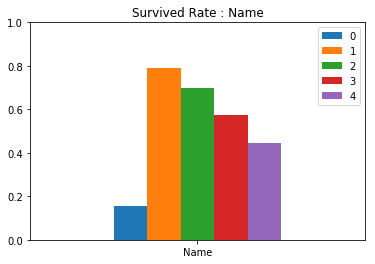

In [21]:
chart_bar('Name')

In [22]:
train_test_data[0].info()
print('\n')
train_test_data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [23]:
train.head()

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3     0   1   22      1      0   
1            2         1       1     1   0   38      1      0   
2            3         1       3     2   0   26      0      0   
3            4         1       1     1   0   35      1      0   
4            5         0       3     0   1   35      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

## 4.Embarked
- We need to fill 2 NaN data.

In [24]:
train.head()

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3     0   1   22      1      0   
1            2         1       1     1   0   38      1      0   
2            3         1       3     2   0   26      0      0   
3            4         1       1     1   0   35      1      0   
4            5         0       3     0   1   35      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [25]:
def chart_embarked(feature, ax):
    df = train.groupby(['Embarked', feature]).size().unstack().T
    df.div(df.sum(axis = 0)).plot(kind = 'bar', rot = 0, title = '{} - Embarked'.format(feature), ax = axes[ax])

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  Ticket  Fare  \
61            62         1       1     2   0   38      0      0  113572  80.0   
829          830         1       1     1   0   62      0      0  113572  80.0   

    Cabin Embarked  
61    B28      NaN  
829   B28      NaN

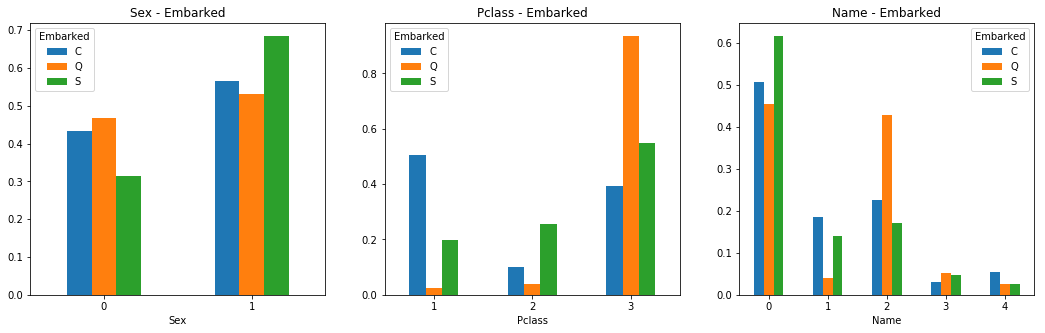

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
chart_embarked('Sex', 0)
chart_embarked('Pclass', 1)
chart_embarked('Name', 2)
train.loc[train["Embarked"].isnull()]

In [27]:
print('People around 50 : \n',train.loc[(train['Age'] > 60) & (train['Age'] < 70), 'Embarked'].value_counts()/train.Embarked.value_counts(), '\n')
print('People around 30 : \n',train.loc[(train['Age'] > 30) & (train['Age'] < 40), 'Embarked'].value_counts()/train.Embarked.value_counts())

People around 50 : 
 C    0.005952
Q    0.012987
S    0.018634
Name: Embarked, dtype: float64 

People around 30 : 
 S    0.175466
C    0.125000
Q    0.064935
Name: Embarked, dtype: float64


1. Passenger62 = Name : Q, Pclass : C, Sex : Q, Age : S
2. Paseenger830 = Name : C, Pclass : C, Sex : Q, Age : S<br>
3. **In Conclusion, 62 : Q, 830 : C** 

In [28]:
train.loc[train['PassengerId'] == 62, 'Embarked'] = 'Q'
train.loc[train['PassengerId'] == 830, 'Embarked'] = 'C'

In [29]:
embarked_map = {'Q' : 0, 'S' : 1, 'C' : 2}
for data in train_test_data:
    data['Embarked'] = data['Embarked'].map(embarked_map)
print(train.info(), '\n')
print(test.info())
train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 80.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3     0   1   22      1      0   
1            2         1       1     1   0   38      1      0   
2            3         1       3     2   0   26      0      0   
3            4         1       1     1   0   35      1      0   
4            5         0       3     0   1   35      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         1  
1          PC 17599  71.2833   C85         2  
2  STON/O2. 3101282   7.9250   NaN         1  
3            113803  53.1000  C123         1  
4            373450   8.0500   NaN         1

## 5. Fare
- Test data has 1 NaN data
- Let's fill it with mean of Fare.

In [30]:
test.loc[test["Fare"].isnull()]

PassengerId  Pclass  Name Sex  Age  SibSp  Parch Ticket  Fare Cabin  \
152         1044       3     0   1   60      0      0   3701   NaN   NaN   

     Embarked  
152         1

In [31]:
merge_df = pd.concat([train, test])

In [32]:
merge_df

Age        Cabin  Embarked      Fare  Name  Parch  PassengerId  Pclass  \
0     22          NaN         1    7.2500     0      0            1       3   
1     38          C85         2   71.2833     1      0            2       1   
2     26          NaN         1    7.9250     2      0            3       3   
3     35         C123         1   53.1000     1      0            4       1   
4     35          NaN         1    8.0500     0      0            5       3   
5     29          NaN         0    8.4583     0      0            6       3   
6     54          E46         1   51.8625     0      0            7       1   
7      2          NaN         1   21.0750     3      1            8       3   
8     27          NaN         1   11.1333     1      2            9       3   
9     14          NaN         2   30.0708     1      0           10       2   
10     4           G6         1   16.7000     2      1           11       3   
11    58         C103         1   26.5500     2      0           12       1   
12    20          NaN         1    8.0500     0      0           13       3   
13    39          NaN         1   31.2750     0      5           14       3   
14    14          NaN         1    7.8542     2      0           15       3   
15    55          NaN         1   16.0000     1      0           16       2   
16     2          NaN         0   29.1250     3      1           17       3   
17    29          NaN         1   13.0000     0      0           18       2   
18    31          NaN         1   18.0000     1      0           19       3   
19    29          NaN         2    7.2250     1      0           20       3   
20    35          NaN         1   26.0000     0      0           21       2   
21    34          D56         1   13.0000     0      0           22       2   
22    15          NaN         0    8.0292     2      0           23       3   
23    28           A6         1   35.5000     0      0           24       1   
24     8          NaN         1   21.0750     2      1           25       3   
25    38          NaN         1   31.3875     1      5           26       3   
26    29          NaN         2    7.2250     0      0           27       3   
27    19  C23 C25 C27         1  263.0000     0      2           28       1   
28    29          NaN         0    7.8792     2      0           29       3   
29    29          NaN         1    7.8958     0      0           30       3   
..   ...          ...       ...       ...   ...    ...          ...     ...   
388   21          NaN         0    7.7500     0      0         1280       3   
389    6          NaN         1   21.0750     3      1         1281       3   
390   23          B24         1   93.5000     0      0         1282       1   
391   51          D28         1   39.4000     1      1         1283       1   
392   13          NaN         1   20.2500     3      2         1284       3   
393   47          NaN         1   10.5000     0      0         1285       2   
394   29          NaN         1   22.0250     0      1         1286       3   
395   18          C31         1   60.0000     1      0         1287       1   
396   24          NaN         0    7.2500     0      0         1288       3   
397   48          B41         2   79.2000     1      1         1289       1   
398   22          NaN         1    7.7750     0      0         1290       3   
399   31          NaN         0    7.7333     0      0         1291       3   
400   30           C7         1  164.8667     2      0         1292       1   
401   38          NaN         1   21.0000     0      0         1293       2   
402   22          NaN         2   59.4000     2      1         1294       1   
403   17          NaN         1   47.1000     0      0         1295       1   
404   43          D40         2   27.7208     0      0         1296       1   
405   20          D38         2   13.8625     0      0         1297       2   
406   23          NaN         1   10.5000     0      0 

In [33]:
test.loc[test['Fare'].isnull(), 'Fare'] = merge_df.loc[(merge_df["Pclass"] == 3) & (merge_df["Embarked"] == 1)]['Fare'].mean()
print(test.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 34.4+ KB
None 



Text(0,0.5,'Fare')

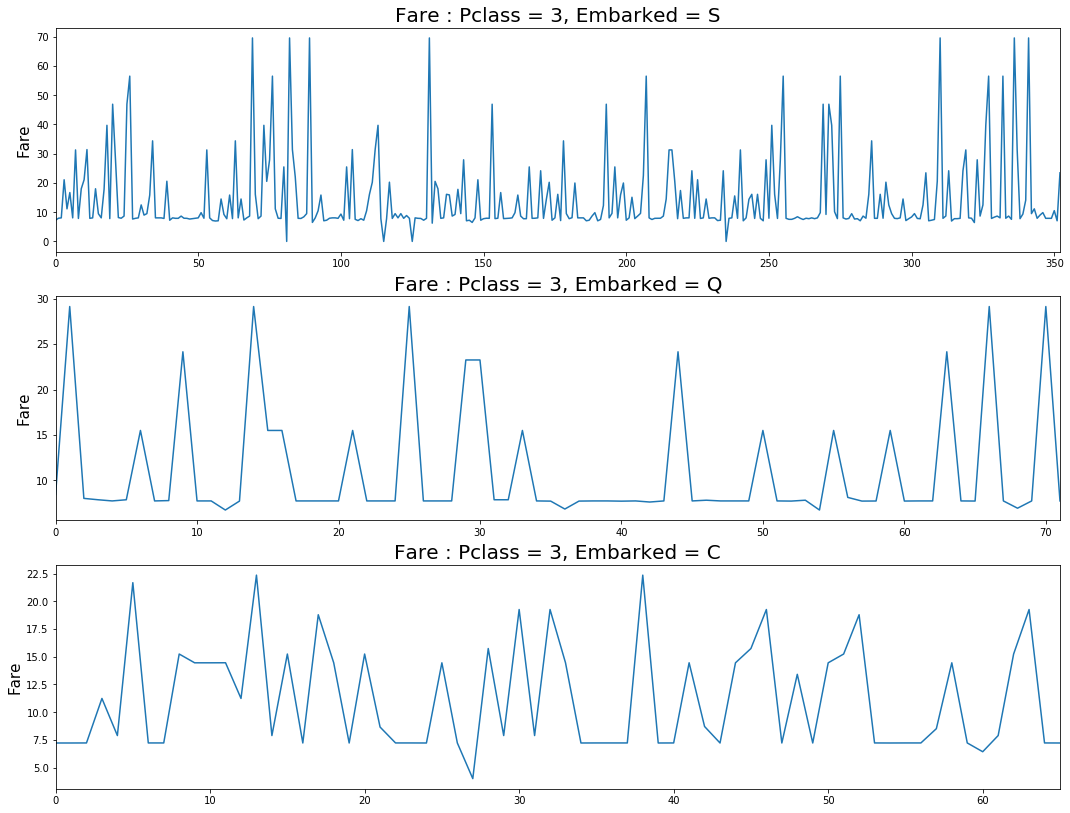

In [34]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (18,14))
ax1 = train.loc[(train["Pclass"] == 3) & (train["Embarked"] == 1)]['Fare'].reset_index(drop = True).plot(title = 'Fare : Pclass = 3, Embarked = S', ax = axes[0])
ax2 = train.loc[(train["Pclass"] == 3) & (train["Embarked"] == 0)]['Fare'].reset_index(drop = True).plot(title = 'Fare : Pclass = 3, Embarked = Q', ax = axes[1])
ax3 = train.loc[(train["Pclass"] == 3) & (train["Embarked"] == 2)]['Fare'].reset_index(drop = True).plot(title = 'Fare : Pclass = 3, Embarked = C', ax = axes[2])

ax1.title.set_size(20)
ax2.title.set_size(20)
ax3.title.set_size(20)

ax1.set_ylabel('Fare', fontsize = 15)
ax2.set_ylabel('Fare', fontsize = 15)
ax3.set_ylabel('Fare', fontsize = 15)

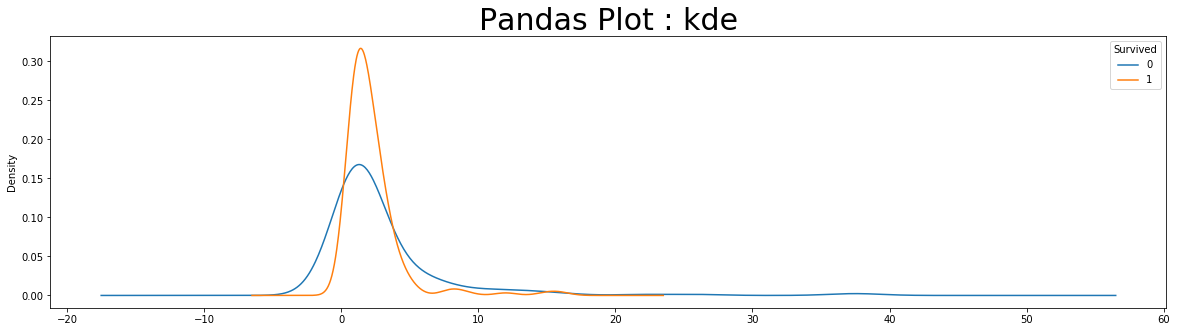

In [35]:
ax = train[['Fare', 'Survived']].groupby(['Survived', 'Fare']).size().unstack().T.plot(kind = 'kde', figsize = (20,5), title = 'Pandas Plot : kde')
ax.title.set_size(30)

Text(0.5,1,'Seaborn Plot : kde')

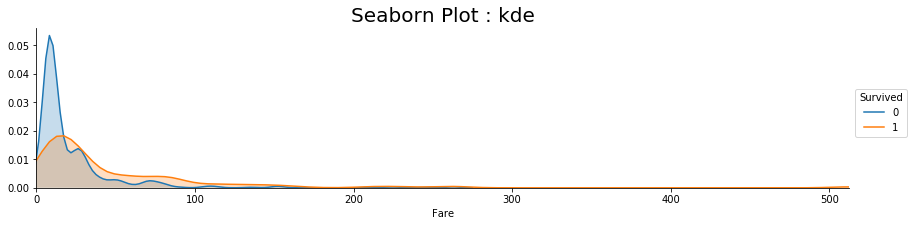

In [36]:
import seaborn as sns
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train["Fare"].max()))
facet.add_legend()
plt.title('Seaborn Plot : kde', fontsize = 20)

## I don't know why those two graphs(Pandas , seaborn kde plot) are different. Especially, range of x-axis and y-axis are different.

(0, 20)

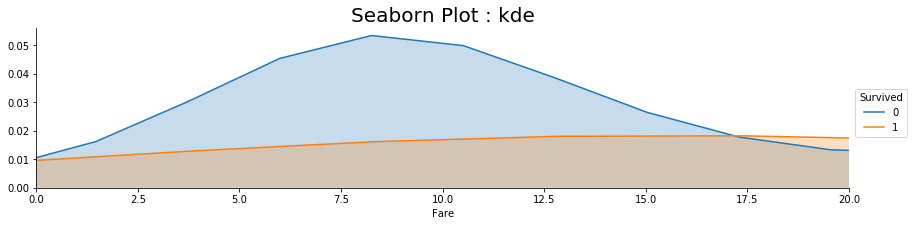

In [37]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train["Fare"].max()))
facet.add_legend()
plt.title('Seaborn Plot : kde', fontsize = 20)
plt.xlim(0,20)

(20, 30)

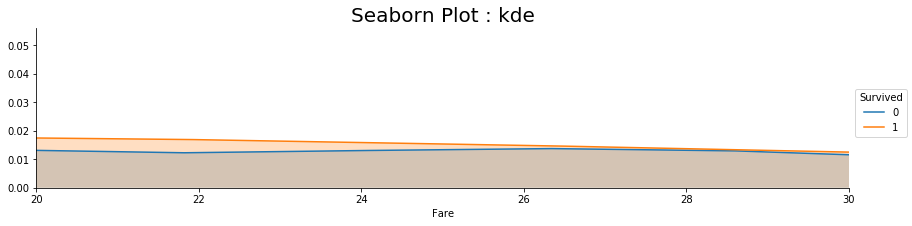

In [38]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train["Fare"].max()))
facet.add_legend()
plt.title('Seaborn Plot : kde', fontsize = 20)
plt.xlim(20, 30)

In [39]:
for data in train_test_data:
    data.loc[data['Fare'] < 17.5, 'Fare'] = 0
    data.loc[(data['Fare'] >= 17.5) & (data['Fare'] < 30), 'Fare'] = 1
    data.loc[data['Fare'] >= 30, 'Fare'] = 2
    data.head()

## 6. Cabin

In [40]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Text(0.5,0,'Pclass')

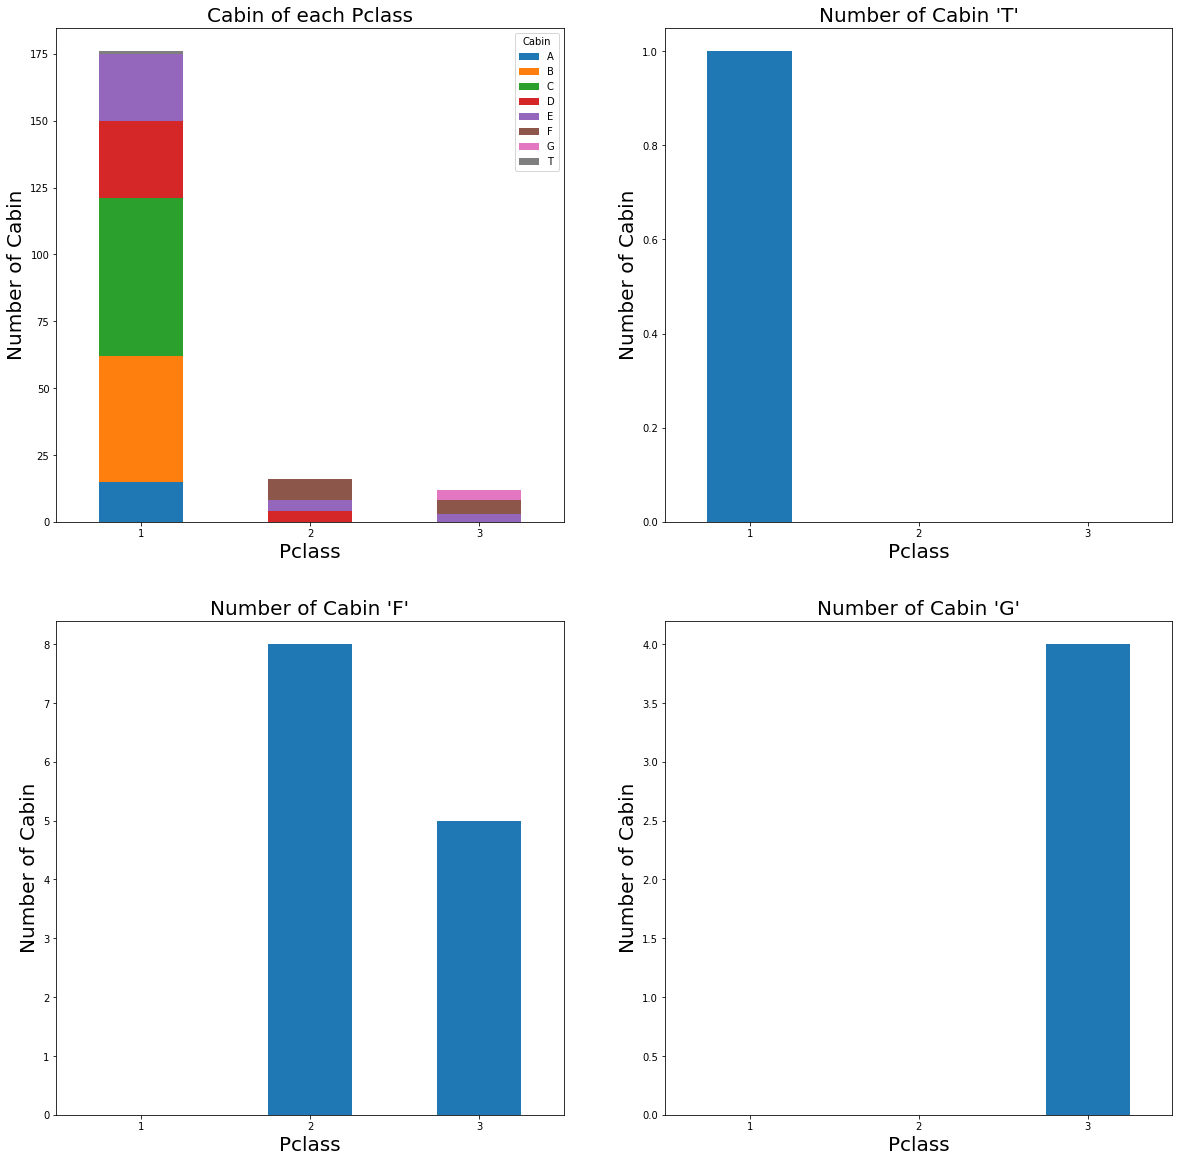

In [41]:
for data in train_test_data:
    data['Cabin'] = data['Cabin'].str[:1]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax1 = train[['Pclass', 'Cabin']].groupby(['Pclass', 'Cabin']).size().unstack().plot(kind = 'bar', stacked = True, rot = 0, ax = axes[0,0])
ax1.set_title('Cabin of each Pclass', fontsize = 20)
ax1.set_xlabel('Pclass', fontsize = 20)
ax1.set_ylabel('Number of Cabin', fontsize = 20)

ax2 = train[['Pclass', 'Cabin']].groupby(['Pclass', 'Cabin']).size().unstack()['T'].plot(kind = 'bar', stacked = True, rot = 0, ax = axes[0,1])
ax2.set_title("Number of Cabin 'T'", fontsize = 20)
ax2.set_ylabel('Number of Cabin', fontsize = 20)
ax2.set_xlabel('Pclass', fontsize = 20)

ax3= train[['Pclass', 'Cabin']].groupby(['Pclass', 'Cabin']).size().unstack()['F'].plot(kind = 'bar', stacked = True, rot = 0, ax = axes[1,0])
ax3.set_title("Number of Cabin 'F'", fontsize = 20)
ax3.set_ylabel('Number of Cabin', fontsize = 20)
ax3.set_xlabel('Pclass', fontsize = 20)

ax4 = train[['Pclass', 'Cabin']].groupby(['Pclass', 'Cabin']).size().unstack()['G'].plot(kind = 'bar', stacked = True, rot = 0, ax = axes[1,1])
ax4.set_title("Number of Cabin 'G'", fontsize = 20)
ax4.set_ylabel('Number of Cabin', fontsize = 20)
ax4.set_xlabel('Pclass', fontsize = 20)

- **Cabin(A,B,C,D,E,T) = 1 Pclass**
- **Cabin(D,E,F) = 2 Pclass**
- **Cabin(E,F,G) = 3 Pclass**

In [42]:
cabin_map = {'A' : 1, 'B' : 1, 'C' : 1, 'D' : 1.4, 'E' : 1.8, 'F' : 2.2, 'G' : 2.6, 'T' : 3.0}
for data in train_test_data:
    data['Cabin'] = data['Cabin'].map(cabin_map)

In [43]:
train.head()

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3     0   1   22      1      0   
1            2         1       1     1   0   38      1      0   
2            3         1       3     2   0   26      0      0   
3            4         1       1     1   0   35      1      0   
4            5         0       3     0   1   35      0      0   

             Ticket  Fare  Cabin  Embarked  
0         A/5 21171   0.0    NaN         1  
1          PC 17599   2.0    1.0         2  
2  STON/O2. 3101282   0.0    NaN         1  
3            113803   2.0    1.0         1  
4            373450   0.0    NaN         1

In [44]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [45]:
print(train.info(), '\n')
print(test.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 80.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3     0   1   22      1      0   
1            2         1       1     1   0   38      1      0   
2            3         1       3     2   0   26      0      0   
3            4         1       1     1   0   35      1      0   
4            5         0       3     0   1   35      0      0   

             Ticket  Fare  Cabin  Embarked  
0         A/5 21171   0.0    2.2         1  
1          PC 17599   2.0    1.0         2  
2  STON/O2. 3101282   0.0    2.2         1  
3            113803   2.0    1.0         1  
4            373450   0.0    2.2         1

## 7. Familysize
- Familysize = sibsp + parch + 1

In [46]:
for data in train_test_data:
    data['Familysize'] = data[['SibSp', 'Parch']].sum(axis = 1) + 1
train.head()

PassengerId  Survived  Pclass  Name Sex  Age  SibSp  Parch  \
0            1         0       3     0   1   22      1      0   
1            2         1       1     1   0   38      1      0   
2            3         1       3     2   0   26      0      0   
3            4         1       1     1   0   35      1      0   
4            5         0       3     0   1   35      0      0   

             Ticket  Fare  Cabin  Embarked  Familysize  
0         A/5 21171   0.0    2.2         1           2  
1          PC 17599   2.0    1.0         2           2  
2  STON/O2. 3101282   0.0    2.2         1           1  
3            113803   2.0    1.0         1           2  
4            373450   0.0    2.2         1           1

## 8. Delete unnecessary columns
- SibSp
- Parch
- Ticket

In [47]:
for data in train_test_data:
    data.drop(['SibSp', 'Parch', 'Ticket'], axis = 1, inplace = True)

In [48]:
train.drop('PassengerId', axis = 1, inplace = True)

In [49]:
train.head()

Survived  Pclass  Name Sex  Age  Fare  Cabin  Embarked  Familysize
0         0       3     0   1   22   0.0    2.2         1           2
1         1       1     1   0   38   2.0    1.0         2           2
2         1       3     2   0   26   0.0    2.2         1           1
3         1       1     1   0   35   2.0    1.0         1           2
4         0       3     0   1   35   0.0    2.2         1           1

In [50]:
test.head()

PassengerId  Pclass  Name Sex  Age  Fare  Cabin  Embarked  Familysize
0          892       3     0   1   34   0.0    2.2         0           1
1          893       3     1   0   47   0.0    2.2         1           2
2          894       2     0   1   62   0.0    2.2         0           1
3          895       3     0   1   27   0.0    2.2         1           1
4          896       3     1   0   22   0.0    2.2         1           3

# Modelling

## 1. Generate Train, Target, Test data

In [51]:
train_data = train.drop('Survived', axis = 1)
target_data = train['Survived']
test_data = test.drop('PassengerId', axis = 1)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null int64
Sex           891 non-null object
Age           891 non-null int32
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Familysize    891 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.2+ KB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Familysize     418 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 27.8+ KB


## 2. Cross Validation(K-fold)

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

## 3. Generate machine learning models

- Multiple Linear Regression
- K-nearest Neighbors
- Decision Tree
- Random Forest
- SVM(Support Vactor Machine)
- Naive Bayes

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Name          891 non-null int64
Sex           891 non-null object
Age           891 non-null int32
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Familysize    891 non-null int64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


### Multiple Linear Regression

In [57]:
lr = LinearRegression()
score = cross_val_score(lr, train_data, target_data, cv = k_fold, n_jobs = 1)

print('scores : ', score, '\n')
print('Linear Regression Accuracy : ', score.mean()*100)

scores :  [0.4581969  0.33221834 0.35357055 0.33928427 0.37797086 0.33916016
 0.34617275 0.38543562 0.48381945 0.42983437] 

Linear Regression Accuracy :  38.45663264483028


### K-nearest Neighbors

In [58]:
knn = KNeighborsClassifier(n_neighbors = 10)
score = cross_val_score(knn, train_data, target_data, cv = k_fold, n_jobs = 1, scoring = 'accuracy')

print('scores : ', score, '\n')
print('K-nearest Neighbors Accuracy : ', score.mean()*100)

scores :  [0.71111111 0.71910112 0.79775281 0.6741573  0.76404494 0.78651685
 0.79775281 0.7752809  0.7752809  0.80898876] 

K-nearest Neighbors Accuracy :  76.09987515605494


### Decision Tree

In [59]:
dt = DecisionTreeClassifier()
score = cross_val_score(dt, train_data, target_data, cv = k_fold, n_jobs = 1, scoring = 'accuracy')

print('scores : ', score, '\n')
print('Decision Tree Accuracy : ', score.mean()*100)

scores :  [0.76666667 0.84269663 0.70786517 0.80898876 0.85393258 0.83146067
 0.79775281 0.79775281 0.78651685 0.76404494] 

Decision Tree Accuracy :  79.57677902621722


### Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(rf, train_data, target_data, cv = k_fold, n_jobs = 1, scoring = 'accuracy')

print('scores : ', score, '\n')
print('Random Forest Accuracy : ', score.mean()*100)

scores :  [0.74444444 0.83146067 0.82022472 0.78651685 0.85393258 0.83146067
 0.83146067 0.79775281 0.7752809  0.76404494] 

Random Forest Accuracy :  80.36579275905119


In [61]:
nb = GaussianNB()
score = cross_val_score(nb, train_data, target_data, cv = k_fold, n_jobs = 1, scoring = 'accuracy')

print('scores : ', score, '\n')
print('Naive Bayes Accuracy', score.mean()*100)

scores :  [0.85555556 0.73033708 0.74157303 0.71910112 0.66292135 0.80898876
 0.73033708 0.78651685 0.84269663 0.80898876] 

Naive Bayes Accuracy 76.87016229712859


In [62]:
svm = SVC()
score = cross_val_score(svm, train_data, target_data, cv = k_fold, n_jobs = 1, scoring = 'accuracy')

print('scores : ', score, '\n')
print('Support Vector Machine Accuracy', score.mean()*100)

scores :  [0.77777778 0.80898876 0.79775281 0.79775281 0.83146067 0.80898876
 0.80898876 0.85393258 0.82022472 0.7752809 ] 

Support Vector Machine Accuracy 80.81148564294631


# Testing
- Predict test data.
- According to upper tries, SVM(Support Vector Machine) predict highest accuracy.
- So for Submit, we will going to use SVM for prediction.

In [63]:
test_data.head()

Pclass  Name Sex  Age  Fare  Cabin  Embarked  Familysize
0       3     0   1   34   0.0    2.2         0           1
1       3     1   0   47   0.0    2.2         1           2
2       2     0   1   62   0.0    2.2         0           1
3       3     0   1   27   0.0    2.2         1           1
4       3     1   0   22   0.0    2.2         1           3

In [64]:
svm = SVC()
svm.fit(X = train_data, y = target_data)
svm.score(X = train_data, y = target_data)

0.8686868686868687

In [65]:
prediction = svm.predict(test_data)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [66]:
submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : prediction})
submission.to_csv('submission.csv', index = False)

In [67]:
df = pd.read_csv('submission.csv')
df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

# Reference
- Minsuk Heo(허민석) GitHub : https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb